# **My First Marketing Analysis**

## **Project Overview**

This project focuses on optimizing marketing expenses for Showz, an online ticketing company. Using server logs, order records, and marketing spend data, the analysis explores customer behavior, purchasing patterns, and the financial effectiveness of different acquisition channels.

**Key Objectives**

- Understand how customers interact with the service (sessions, frequency, devices).
- Measure conversion timing: how long it takes for users to make their first purchase.
- Calculate Customer Lifetime Value (LTV) and assess overall revenue contribution.
- Analyze Customer Acquisition Cost (CAC) and Return on Marketing Investment (ROMI) by channel.
- Provide actionable recommendations for marketing budget allocation.

**Data Sources**

- Visits dataset: user sessions, devices, sources, timestamps.
- Orders dataset: purchase timestamps and revenue.
- Costs dataset: daily marketing spend per acquisition channel.

**Methodology & Metrics**

- Cohort analysis: user retention and conversion speed.
- Session analysis: daily, weekly, and monthly usage trends.
- Revenue analysis: purchase frequency, average order size, and LTV.
- Marketing efficiency: CAC and ROMI across advertising channels and devices.
- Visualization: trends in user activity, sales, and marketing efficiency over time.

**Insights & Recommendations**

- Identified the most effective marketing channels in terms of ROMI.
- Highlighted user behavior patterns that impact conversion and retention.
- Recommended where to allocate marketing budgets based on profitability and acquisition efficiency.

**Tools & Technologies**

- Python (Pandas, NumPy) – Data cleaning and analysis
- Matplotlib / Seaborn – Data visualization
- Cohort & LTV analysis – Customer behavior insights
- ROMI/CAC evaluation – Marketing performance

This project demonstrates the application of marketing analytics, cohort analysis, and financial evaluation to support data-driven decision-making in digital marketing.

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Create df´s from csv files
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

In [3]:
#'visits' visualization
visits.info()
print(visits.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  

First, I would change the column names since they have capital letters and spaces. I'm more comfortable with the snake_case format. The object types in the 'End Ts' and 'Start Ts' columns should be changed to datetime, and 'Source id' and 'Uid' should be changed to string.

In [4]:
#Change df´s column names
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [5]:
#Change dtype to datetime
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
#Change dtype to string
visits['source_id'] = visits['source_id'].astype('int')
visits['uid'] = visits['uid'].astype('str')

In [6]:
#Check changes
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int32         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  object        
dtypes: datetime64[ns](2), int32(1), object(2)
memory usage: 12.3+ MB


In [7]:
#Check duplicates
print('Duplicates:', visits.duplicated().sum())

Duplicates: 0


In [8]:
#'orders' visualization
orders.info()
print(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382


Likewise, I would first change the column names since they have capital letters and spaces; I'm more comfortable with the snake_case format. The object types in the columns 'Buy Ts' should be changed to datetime and 'Uid' to string.

In [9]:
#Change 'orders' column names
orders.columns = ['buy_ts', 'revenue', 'uid']

In [10]:
#Change dtype to datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
#Change dtype to string
orders['uid'] = orders['uid'].astype('str')

In [11]:
#Check changes
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.2+ MB


In [12]:
#Check duplicates
print('Duplicates:', orders.duplicated().sum())

Duplicates: 0


In [13]:
#'costs' visualization
costs.info()
print(costs.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24


The object types in the columns 'dt' must be changed to datetime and 'source_id' to string.

In [14]:
#Change dtype to datetime
costs['dt'] = pd.to_datetime(costs['dt'])
#Change dtype to string
costs['source_id'] = costs['source_id'].astype('int')

In [15]:
#Check changes
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int32         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 49.8 KB


In [16]:
#Get dtypes needed for user´s analysis by month, week and day 
visits['visit_month'] = visits['start_ts'].dt.to_period('M').dt.to_timestamp()
visits['visit_week'] = visits['start_ts'].dt.to_period('W').dt.start_time
visits['visit_day'] = visits['start_ts'].dt.date
print(visits.head(5))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid visit_month visit_week   visit_day  
0  16879256277535980062  2017-12-01 2017-12-18  2017-12-20  
1    104060357244891740  2018-02-01 2018-02-19  2018-02-19  
2   7459035603376831527  2017-07-01 2017-06-26  2017-07-01  
3  16174680259334210214  2018-05-01 2018-05-14  2018-05-20  
4   9969694820036681168  2017-12-01 2017-12-25  2017-12-27  


In [17]:
#Group visitors by month
monthly_users = visits.groupby('visit_month').agg({'uid': 'nunique'}).reset_index()
print(monthly_users.head(10))
#Get average monthly visitors
monthly_users_avg = monthly_users['uid'].mean()
print('Promedio de visitantes al mes: ', monthly_users_avg)

  visit_month    uid
0  2017-06-01  13259
1  2017-07-01  14183
2  2017-08-01  11631
3  2017-09-01  18975
4  2017-10-01  29692
5  2017-11-01  32797
6  2017-12-01  31557
7  2018-01-01  28716
8  2018-02-01  28749
9  2018-03-01  27473
Promedio de visitantes al mes:  23228.416666666668


In [18]:
#Group visitors by week
weekly_users = visits.groupby('visit_week').agg({'uid': 'nunique'}).reset_index()
print(weekly_users.head(10))
#Get average visitors by week
weekly_users_avg = weekly_users['uid'].mean()
print('Promedio de visitantes a la semana:', weekly_users_avg)

  visit_week   uid
0 2017-05-29  2021
1 2017-06-05  4129
2 2017-06-12  2812
3 2017-06-19  2878
4 2017-06-26  3064
5 2017-07-03  3294
6 2017-07-10  4355
7 2017-07-17  3841
8 2017-07-24  2655
9 2017-07-31  2364
Promedio de visitantes a la semana: 5716.245283018868


In [19]:
#Group visitors by day
daily_users = visits.groupby('visit_day').agg({'uid': 'nunique'}).reset_index()
print(daily_users.head(10))
#Get average visitors by day
daily_users_avg = daily_users['uid'].mean()
print('Promedio de visitantes al día:', daily_users_avg)

    visit_day  uid
0  2017-06-01  605
1  2017-06-02  608
2  2017-06-03  445
3  2017-06-04  476
4  2017-06-05  820
5  2017-06-06  797
6  2017-06-07  699
7  2017-06-08  868
8  2017-06-09  695
9  2017-06-10  350
Promedio de visitantes al día: 907.9917582417582


In [20]:
#Group sessions by day
daily_visits = visits.groupby('visit_day').agg({'uid': 'count'}).reset_index()
print(daily_visits.head(10))
#Get average sessions by day
daily_visits_avg = daily_visits['uid'].mean()
print('Promedio de sesiones al día:', daily_visits_avg)

    visit_day  uid
0  2017-06-01  664
1  2017-06-02  658
2  2017-06-03  477
3  2017-06-04  510
4  2017-06-05  893
5  2017-06-06  875
6  2017-06-07  788
7  2017-06-08  939
8  2017-06-09  755
9  2017-06-10  375
Promedio de sesiones al día: 987.3626373626373


There are approximately 23,228 visitors per month, 5,724 per week, and 908 per day, with an approximate of 987 sessions per day, which implies that there are approximately 1.9 sessions per user per day, determining that more than one user enters the platform more than once.

In [21]:
#Get sessions duration in minutes and add it to 'visits' 
visits['visit_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60
print(visits.head(10))
#Get the average duration per session
avg_visit_ts = visits['visit_duration'].mean()
print('Una sesión dura en promedio', avg_visit_ts, 'minutos')

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid visit_month visit_week   visit_day  visit_duration  
0  16879256277535980062  2017-12-01 2017-12-18  2017-12-20            18.0  
1    104060357244891740  2018-02-01 2018-02-19  2018-02-19            28.0  
2   7459035603376831527  2017-07-01 2017-06-26  2017-

In [22]:
#Get how many users return
returned = visits.groupby('uid').agg({'visit_day': 'nunique'}).reset_index()
returned_users = returned[returned['visit_day'] > 1]
returned_users = returned_users['uid'].nunique()

#Get total users
total_users = visits['uid'].nunique()

#Get the percentage of return
returned_rate = returned_users / total_users * 100
print('% of users return: ', returned_rate)

% of users return:  19.741945663083065


In [23]:
#Create a new df with users buying behavior
behavior = pd.merge(visits, orders, how = 'inner', on = 'uid')
print(behavior.head(10))
#Check duplicates
print('Duplicates:', behavior.duplicated().sum())

    device              end_ts  source_id            start_ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
5  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
6  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
7  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
8  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
9  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   

                    uid visit_month visit_week   visit_day  visit_duration  \
0  16174680259334210214  2018-05-01 2018-05-14  2018-05-20            24.0   
1  16007536194108375387  2017-09-01 2017-08-28  2017-09-03             1.0   
2  16007536194108375387  2017-09-01 2017-08-28  20

In [24]:
#Fill nulls in 'revenue' to do calculations 
behavior['revenue'] = behavior['revenue'].fillna(0)
print(behavior.head(10))

    device              end_ts  source_id            start_ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
5  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
6  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
7  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
8  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
9  desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   

                    uid visit_month visit_week   visit_day  visit_duration  \
0  16174680259334210214  2018-05-01 2018-05-14  2018-05-20            24.0   
1  16007536194108375387  2017-09-01 2017-08-28  2017-09-03             1.0   
2  16007536194108375387  2017-09-01 2017-08-28  20

In [25]:
#Find users´ first visit date
first_visit_date_by_customers = behavior.groupby('uid')['start_ts'].min().reset_index()
first_visit_date_by_customers.columns = ['uid', 'first_visit_date']
print(first_visit_date_by_customers.head(10))

                    uid    first_visit_date
0  10000837700716403746 2017-06-08 10:12:00
1  10000997030965831953 2018-01-19 11:16:00
2  10001199569370567060 2017-11-25 17:26:00
3  10002243978166172255 2017-10-15 17:18:00
4  10003351403065971701 2017-11-20 13:17:00
5  10003425910527970929 2018-03-25 19:01:00
6  10003843789561818935 2017-09-25 23:05:00
7  10003858247064282365 2017-08-22 23:05:00
8  10003922165532733227 2017-11-16 09:42:00
9  10004355444061692288 2017-12-03 12:43:00


In [26]:
#Check duplicates
print('Duplicates:', first_visit_date_by_customers.duplicated().sum())

Duplicates: 0


In [27]:
#Find users' first order date
orders_by_customer = behavior[['uid', 'buy_ts', 'device']].sort_values(['uid', 'buy_ts'])
orders_by_customer = orders_by_customer[orders_by_customer['buy_ts'].notna()]
print(orders_by_customer.head(10))

                         uid              buy_ts   device
40394   10000837700716403746 2017-06-21 16:12:00  desktop
44644   10000837700716403746 2017-06-21 16:12:00  desktop
139382  10000837700716403746 2017-06-21 16:12:00  desktop
153393  10000837700716403746 2017-06-21 16:12:00  desktop
360220  10000837700716403746 2017-06-21 16:12:00  desktop
453444  10000837700716403746 2017-06-21 16:12:00  desktop
757162  10000837700716403746 2017-06-21 16:12:00  desktop
417180  10000997030965831953 2018-01-19 12:28:00  desktop
122856  10001199569370567060 2017-11-25 17:29:00    touch
128167  10001199569370567060 2017-11-25 17:29:00    touch


In [28]:
#Check duplicates
print('Duplicates:', orders_by_customer.duplicated().sum())

Duplicates: 705869


In [29]:
#Create df for cohort development with first ordes and visit dates
cohort_buy = pd.merge(first_visit_date_by_customers, orders_by_customer, how = 'outer', on = 'uid')
#Eliminates nulls
cohort_buy = cohort_buy[cohort_buy['buy_ts'].notna()]
#Change dtype to calculate days
cohort_buy['first_visit_date'] = cohort_buy['first_visit_date'].dt.floor('D')
cohort_buy['buy_ts'] = cohort_buy['buy_ts'].dt.floor('D')
print(cohort_buy.head(10))

                    uid first_visit_date     buy_ts   device
0  10000837700716403746       2017-06-08 2017-06-21  desktop
1  10000837700716403746       2017-06-08 2017-06-21  desktop
2  10000837700716403746       2017-06-08 2017-06-21  desktop
3  10000837700716403746       2017-06-08 2017-06-21  desktop
4  10000837700716403746       2017-06-08 2017-06-21  desktop
5  10000837700716403746       2017-06-08 2017-06-21  desktop
6  10000837700716403746       2017-06-08 2017-06-21  desktop
7  10000997030965831953       2018-01-19 2018-01-19  desktop
8  10001199569370567060       2017-11-25 2017-11-25    touch
9  10001199569370567060       2017-11-25 2017-11-25    touch


In [30]:
#Get how many days users take to buy and add it to the df 
cohort_buy['days_for_order'] = (cohort_buy['buy_ts'] - cohort_buy['first_visit_date']).dt.days
#Eliminate duplicates
cohort_buy = cohort_buy.drop_duplicates()
cohort_buy = cohort_buy.groupby(['uid', 'first_visit_date', 'buy_ts', 'device']).agg({'days_for_order': 'sum'}).reset_index()
print(cohort_buy.head(10))

                    uid first_visit_date     buy_ts   device  days_for_order
0  10000837700716403746       2017-06-08 2017-06-21  desktop              13
1  10000997030965831953       2018-01-19 2018-01-19  desktop               0
2  10001199569370567060       2017-11-25 2017-11-25    touch               0
3  10002243978166172255       2017-10-15 2017-10-15  desktop               0
4  10002243978166172255       2017-10-15 2017-12-08  desktop              54
5  10002243978166172255       2017-10-15 2017-12-10  desktop              56
6  10003351403065971701       2017-11-20 2017-11-20  desktop               0
7  10003425910527970929       2018-03-25 2018-03-25  desktop               0
8  10003843789561818935       2017-09-25 2017-12-12  desktop              78
9  10003858247064282365       2017-08-22 2017-10-31  desktop              70


At first I found duplicates in 'cohort_buy' for some reason, maybe they were created after the merge, I realized when checking the notebook and noticed that the subsequent results were wrong.

In [31]:
#Pivot table for a quick data visualization
cohort_buy_pivot = cohort_buy.pivot_table(
    index = 'first_visit_date',
    columns = 'days_for_order',
    values = 'uid',
    aggfunc = 'count'
)

print(cohort_buy_pivot)

days_for_order      0     1     2    3     4    5    6    7    8    9    ...  \
first_visit_date                                                         ...   
2017-06-01         97.0  16.0  10.0  3.0  14.0  4.0  8.0  2.0  5.0  1.0  ...   
2017-06-02         92.0   1.0   3.0  7.0   2.0  NaN  1.0  4.0  NaN  NaN  ...   
2017-06-03         58.0   2.0   3.0  4.0   2.0  NaN  1.0  2.0  NaN  1.0  ...   
2017-06-04         56.0   6.0  10.0  1.0   1.0  NaN  NaN  NaN  NaN  2.0  ...   
2017-06-05        138.0  23.0   6.0  2.0   9.0  1.0  2.0  1.0  2.0  NaN  ...   
...                 ...   ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   
2018-05-27         46.0   4.0   3.0  NaN   3.0  NaN  NaN  NaN  NaN  NaN  ...   
2018-05-28         88.0   8.0   2.0  5.0   NaN  NaN  NaN  NaN  NaN  NaN  ...   
2018-05-29         83.0   4.0   4.0  NaN   NaN  NaN  NaN  NaN  NaN  NaN  ...   
2018-05-30        104.0  76.0   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  ...   
2018-05-31        340.0   1.0   NaN  NaN

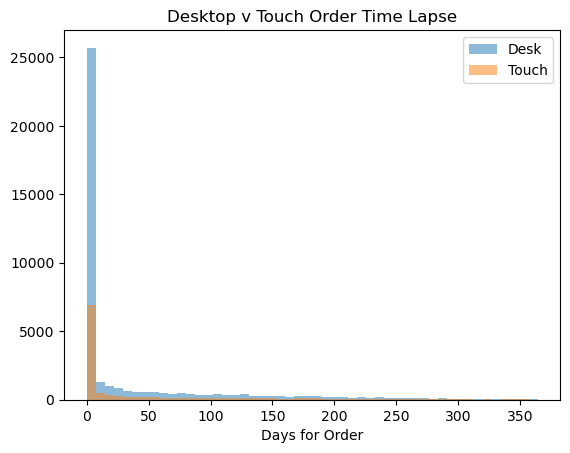

Desktop users take 0.0 to make a purchase
Touch users take 2.0 to make a purchase


In [32]:
#Separate cohorts by device
cohort_buy_desk = cohort_buy[cohort_buy['device'] == 'desktop']
cohort_buy_touch = cohort_buy[cohort_buy['device'] == 'touch']

#Plot cohorts in histogram
plt.hist(cohort_buy_desk['days_for_order'], bins = 50, alpha = 0.5)
plt.hist(cohort_buy_touch['days_for_order'], bins = 50, alpha = 0.5)
plt.title('Desktop v Touch Order Time Lapse')
plt.xlabel('Days for Order')
plt.legend(['Desk', 'Touch'])
plt.show()

#Get average days between the first visit and the first order
desk_days_mean = cohort_buy_desk['days_for_order'].median()
touch_days_mean = cohort_buy_touch['days_for_order'].median()

print('Desktop users take', desk_days_mean, 'to make a purchase')
print('Touch users take', touch_days_mean, 'to make a purchase')

It seems that orders for Desktop and Touch follow a similar distribution, but with very different order quantities. At first glance, it can be seen that many more orders are placed on Desktop than on Touch, especially in the first few days of visiting the platform. The median number of days it takes a user to make a purchase was obtained for both distributions, as they are heavily skewed to the right, so the average would not be very useful for determining this data. Desktop users place orders on the same day as their first visit, while Touch users take two days. Perhaps they take longer to familiarize themselves with the platform on smartphones, or perhaps it is more complicated to add payment methods on these devices than on Desktop. It can be concluded that first-time desktop users are more likely to purchase more quickly than Touch users.

In [33]:
#Get how many order make an user in Desktop
desk_orders= cohort_buy_desk['uid'].count()
desk_orders_avg = desk_orders / cohort_buy_desk['uid'].nunique()
print('Desktop user make', desk_orders_avg, 'purchases in average')

Desktop user make 1.298705966930266 purchases in average


In [34]:
#Get how many order make an user in Touch
touch_orders= cohort_buy_touch['uid'].count()
touch_orders_avg = touch_orders / cohort_buy_touch['uid'].nunique()
print('Touch users make', touch_orders_avg, 'purchases in average')

Touch users make 1.3231597845601437 purchases in average


Touch users place slightly more orders than desktop users, which is a good indicator, since both versions of the platform, despite having smaller numbers of users, maintain a similar average order count. Therefore, it can be said that the platform works in terms of average conversion on both devices.

In [35]:
#Create cohorts by orders by month
cohort_monthly_orders = behavior.copy()
cohort_monthly_orders = cohort_monthly_orders[cohort_monthly_orders['buy_ts'].notna()]
cohort_monthly_orders['first_order_date'] = cohort_monthly_orders.groupby('uid')['buy_ts'].transform('min')
print(cohort_monthly_orders)

         device              end_ts  source_id            start_ts  \
0       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
2       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4       desktop 2018-02-06 15:50:00          4 2018-02-06 15:45:00   
...         ...                 ...        ...                 ...   
761802    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
761803    touch 2018-01-25 17:38:19          1 2018-01-25 17:38:00   
761804  desktop 2018-03-03 10:12:19          4 2018-03-03 10:12:00   
761805  desktop 2017-11-02 10:12:19          5 2017-11-02 10:12:00   
761806    touch 2017-09-10 13:13:19          2 2017-09-10 13:13:00   

                         uid visit_month visit_week   visit_day  \
0       16174680259334210214  2018-05-01 2018-05-14  2018-05-20   
1       16007536194108375

In [36]:
#Get purchases' months
cohort_monthly_orders['order_month'] = (cohort_monthly_orders['buy_ts'] - cohort_monthly_orders['first_order_date']).dt.days / 30.44
cohort_monthly_orders['order_month'] = cohort_monthly_orders['order_month'].apply(np.ceil).astype('int')
#Since there are several duplicates in columns that will not be needed, only the useful ones will be extracted 
cohort_monthly_orders = cohort_monthly_orders[['device', 'source_id', 'uid', 'buy_ts', 'revenue', 'first_order_date', 'order_month']]
#Eliminate duplicates
cohort_monthly_orders = cohort_monthly_orders.drop_duplicates().reset_index()
print(cohort_monthly_orders.head(10))

   index   device  source_id                   uid              buy_ts  \
0      0  desktop          9  16174680259334210214 2018-03-09 20:25:00   
1      1  desktop          5  16007536194108375387 2017-09-04 12:46:00   
2      2  desktop          5  16007536194108375387 2017-10-28 00:01:00   
3      3  desktop          5  16007536194108375387 2017-10-28 19:16:00   
4      4  desktop          4   8056418121947262981 2017-06-25 08:54:00   
5      5  desktop          4   8056418121947262981 2017-06-26 09:14:00   
6      6  desktop          4   8056418121947262981 2017-06-26 12:12:00   
7      7  desktop          4   8056418121947262981 2017-06-28 19:25:00   
8      8  desktop          4   8056418121947262981 2017-09-07 20:09:00   
9      9  desktop          4   8056418121947262981 2017-09-08 01:01:00   

   revenue    first_order_date  order_month  
0     2.33 2018-03-09 20:25:00            0  
1     2.44 2017-09-04 12:46:00            0  
2     1.53 2017-09-04 12:46:00            2  
3

In [37]:
#Encontrar el mes de las primeras compras y las subsiguientes
cohort_monthly_orders['first_order_month'] = cohort_monthly_orders['first_order_date'].dt.to_period('M')
cohort_monthly_orders['buy_month'] = cohort_monthly_orders['buy_ts'].dt.to_period('M')
print(cohort_monthly_orders)

         index   device  source_id                   uid              buy_ts  \
0            0  desktop          9  16174680259334210214 2018-03-09 20:25:00   
1            1  desktop          5  16007536194108375387 2017-09-04 12:46:00   
2            2  desktop          5  16007536194108375387 2017-10-28 00:01:00   
3            3  desktop          5  16007536194108375387 2017-10-28 19:16:00   
4            4  desktop          4   8056418121947262981 2017-06-25 08:54:00   
...        ...      ...        ...                   ...                 ...   
105119  759806    touch          9   8638199837440131075 2018-01-18 14:37:00   
105120  759807  desktop          4   6406595666419694649 2018-03-21 19:33:00   
105121  759808  desktop          3   6292692062159304168 2018-04-25 21:07:00   
105122  759809  desktop         10  12734910664455613822 2018-04-23 21:16:00   
105123  759811  desktop          3  11102751930812818282 2017-07-31 12:27:00   

        revenue    first_order_date  or

In [38]:
#Separate cohorts by device
cohort_monthly_orders_desk = cohort_monthly_orders[cohort_monthly_orders['device'] == 'desktop']
cohort_monthly_orders_touch = cohort_monthly_orders[cohort_monthly_orders['device'] == 'touch']

<Axes: title={'center': 'Monthly Orders Desktop'}, xlabel='order_month', ylabel='first_order_month'>

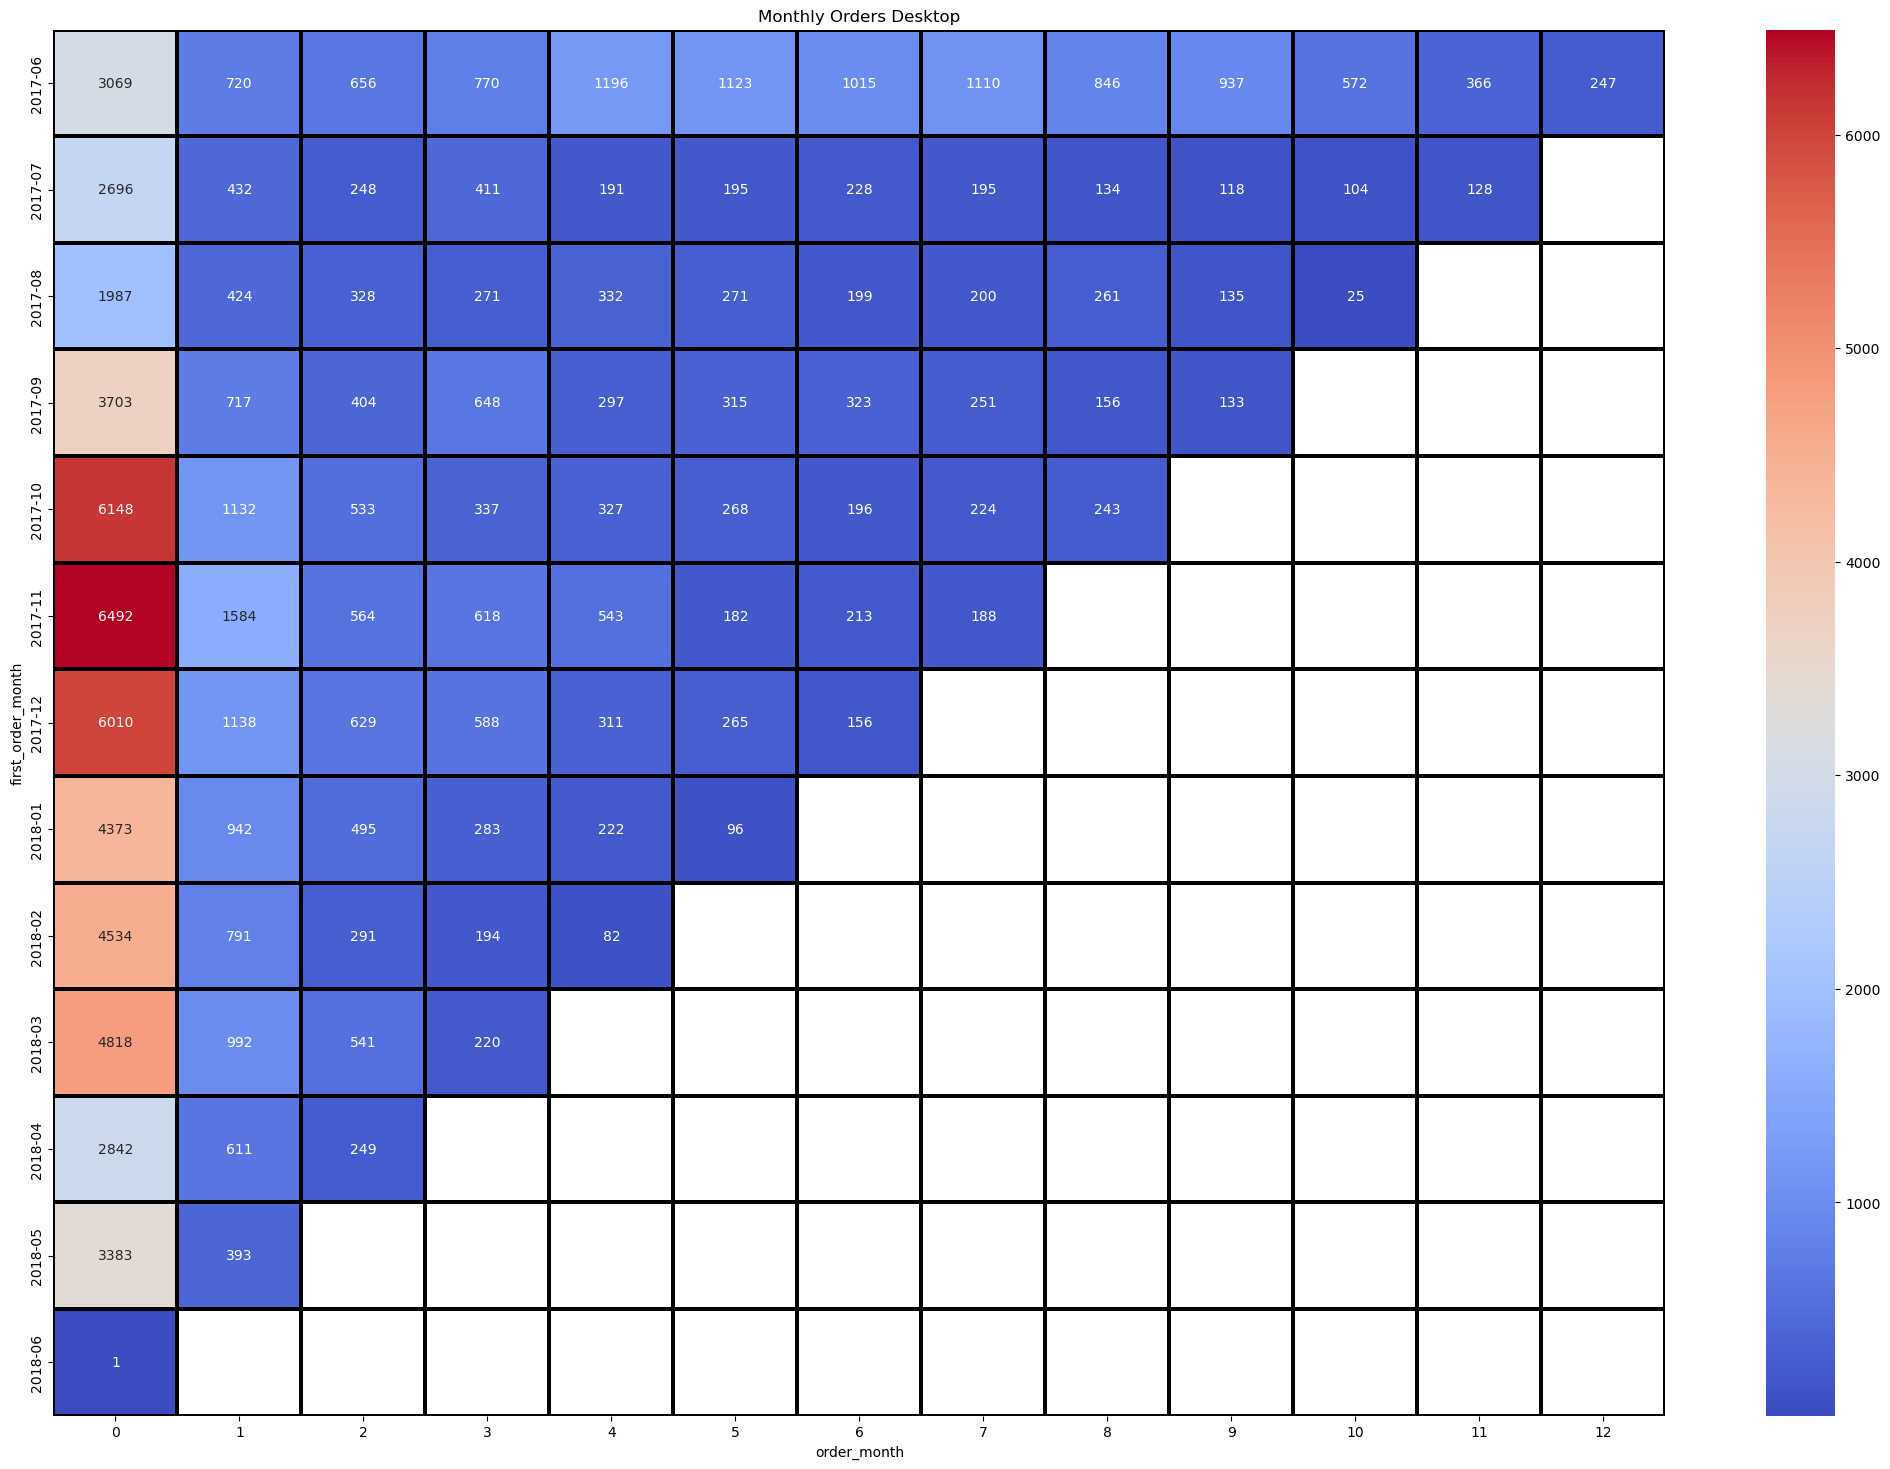

In [39]:
#Visulaize Desktop cohorts behavior 
pivot_monthly_orders_desk = cohort_monthly_orders_desk.pivot_table(
    index = 'first_order_month',
    columns = 'order_month',
    values = 'uid',
    aggfunc = 'count'
)

plt.figure(figsize = (26, 18))
plt.title('Monthly Orders Desktop')
sns.heatmap(pivot_monthly_orders_desk,
            cmap = 'coolwarm',
           annot = True,
           fmt = '.0f',
           linewidths = 1.5,
           linecolor = 'black')

<Axes: title={'center': 'Monthly Orders Touch'}, xlabel='order_month', ylabel='first_order_month'>

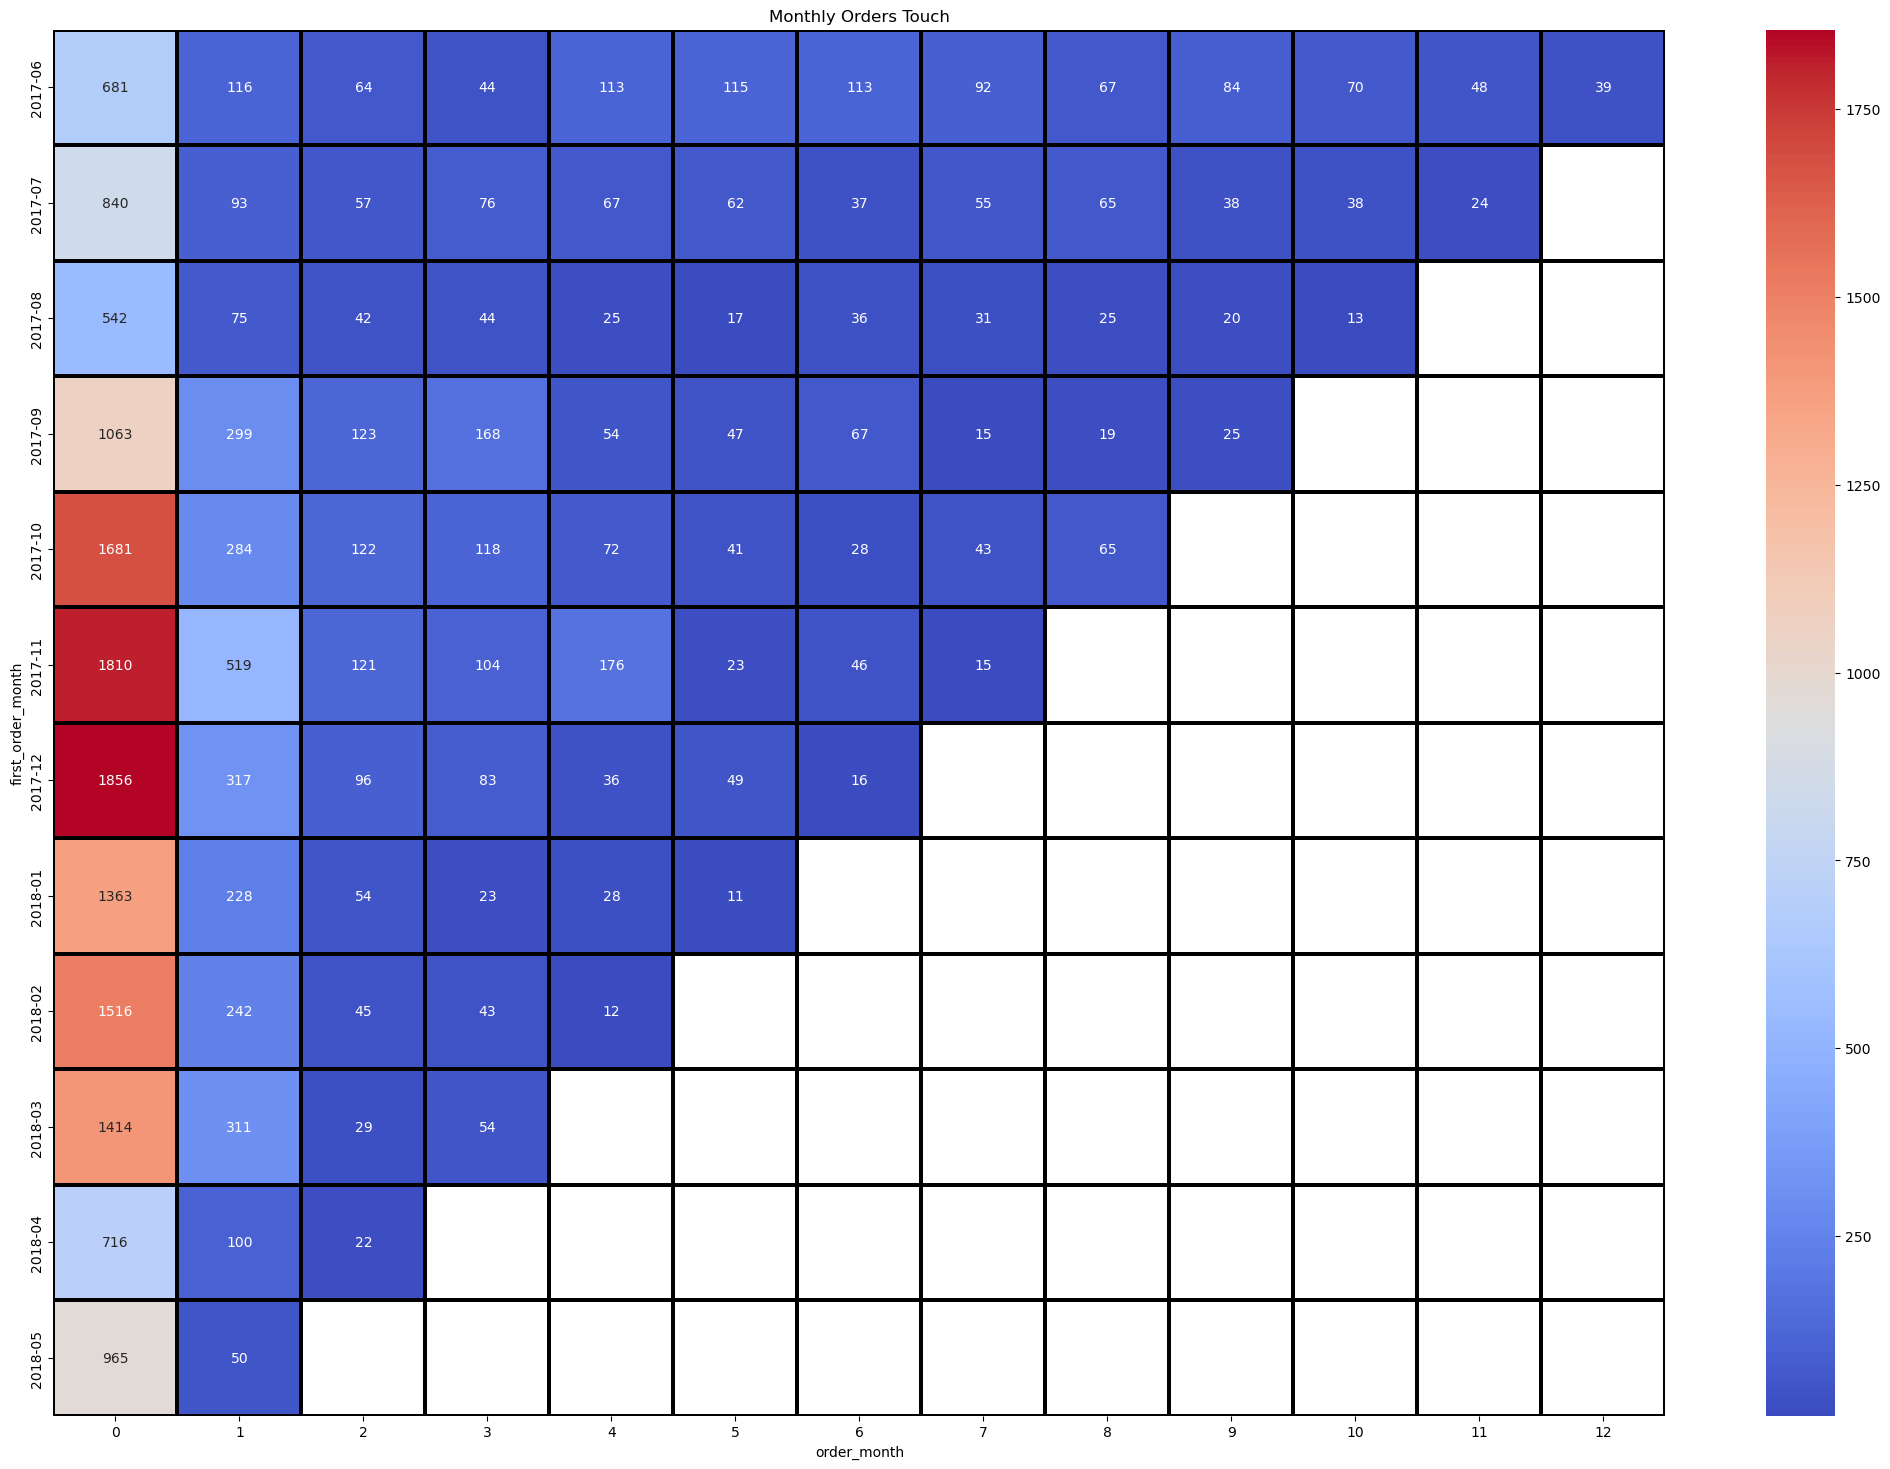

In [40]:
#Visulaize Touch cohorts behavior 
pivot_monthly_orders_touch = cohort_monthly_orders_touch.pivot_table(
    index = 'first_order_month',
    columns = 'order_month',
    values = 'uid',
    aggfunc = 'count'
)

plt.figure(figsize = (26, 18))
plt.title('Monthly Orders Touch')
sns.heatmap(pivot_monthly_orders_touch,
            cmap = 'coolwarm',
           annot = True,
           fmt = '.0f',
           linewidths = 1.5,
           linecolor = 'black')

Both cohorts of monthly orders have similar behaviors, with a large number in month 0 and decreasing over time. Interestingly, in both analyses, the cohorts from June, July, and August 2017, and April and May 2018, are the cohorts with the lowest orders. It remains to be seen whether there were any promotions or customer attraction methods in the other months, leading to a peak in November and December 2017. Perhaps some shows launched their tickets during those months, or there were special end-of-year events. It could also be that spring and summer don't see as many new event launches, as those are the most popular times, and people should have already obtained their tickets.

In [41]:
#Get revenue for Desktop users 
desk_revenue = behavior.copy()
desk_revenue = desk_revenue[desk_revenue['device'] == 'desktop']
desk_revenue = desk_revenue[desk_revenue['revenue'] > 0]
desk_revenue = desk_revenue.groupby('uid').agg({'revenue': 'sum'}).reset_index()

#Average revenue per Desktop user
print(desk_revenue.head(10))
print('Desktop users generate an average revenue of: $', desk_revenue['revenue'].mean())

                    uid  revenue
0  10000837700716403746    15.40
1  10000997030965831953     1.83
2  10002243978166172255   139.28
3  10003351403065971701     6.72
4  10003425910527970929     1.34
5  10003843789561818935     0.09
6  10003858247064282365    11.34
7  10003922165532733227     9.17
8  10004355444061692288    22.00
9  10004520995298646917     9.76
Desktop users generate an average revenue of: $ 210.79126450684888


In [42]:
#Get revenue for Touch users 
touch_revenue = behavior.copy()
touch_revenue = touch_revenue[touch_revenue['device'] == 'touch']
touch_revenue = touch_revenue[touch_revenue['revenue'] > 0]
touch_revenue = touch_revenue.groupby('uid').agg({'revenue': 'sum'}).reset_index()

#Average revenue per Touch user
print(touch_revenue.head(10))
print('Touch users generate an average revenue of: $', touch_revenue['revenue'].mean())

                    uid  revenue
0  10001199569370567060     7.00
1  10004761330801662264     3.05
2  10005299895892194284    10.52
3   1000920766094501476     1.47
4  10009217442472660986     1.47
5  10010666695712790985     9.17
6   1001532507035175637     8.54
7  10018734914331324283     1.95
8  10020264398710866965     1.83
9  10021346541218186590   216.90
Touch users generate an average revenue of: $ 57.716682751655256


In [43]:
#Get cohort sizes for Desktop users
cohort_sizes_desk = cohort_monthly_orders_desk.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_desk.columns = ['first_order_month', 'n_users']
print(cohort_sizes_desk.head(10))

  first_order_month  n_users
0           2017-06     1765
1           2017-07     1601
2           2017-08     1170
3           2017-09     2152
4           2017-10     3703
5           2017-11     3512
6           2017-12     3668
7           2018-01     2788
8           2018-02     2971
9           2018-03     2925


In [44]:
#Get total revenue by cohort
cohort_desk_revenue = cohort_monthly_orders_desk.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohort_desk_revenue.head(10))

  first_order_month  order_month   revenue
0           2017-06            0  13328.47
1           2017-06            1   4540.80
2           2017-06            2   3233.03
3           2017-06            3   4528.70
4           2017-06            4  10699.48
5           2017-06            5   7391.03
6           2017-06            6   9042.64
7           2017-06            7   6370.57
8           2017-06            8   5964.31
9           2017-06            9   5120.81


In [45]:
#Merge cohort sizes and revenue
report_desk = pd.merge(cohort_sizes_desk, cohort_desk_revenue, on = 'first_order_month')
print(report_desk.head(10))

  first_order_month  n_users  order_month   revenue
0           2017-06     1765            0  13328.47
1           2017-06     1765            1   4540.80
2           2017-06     1765            2   3233.03
3           2017-06     1765            3   4528.70
4           2017-06     1765            4  10699.48
5           2017-06     1765            5   7391.03
6           2017-06     1765            6   9042.64
7           2017-06     1765            7   6370.57
8           2017-06     1765            8   5964.31
9           2017-06     1765            9   5120.81


<Axes: title={'center': 'Desktop LTV by Month'}, xlabel='order_month', ylabel='first_order_month'>

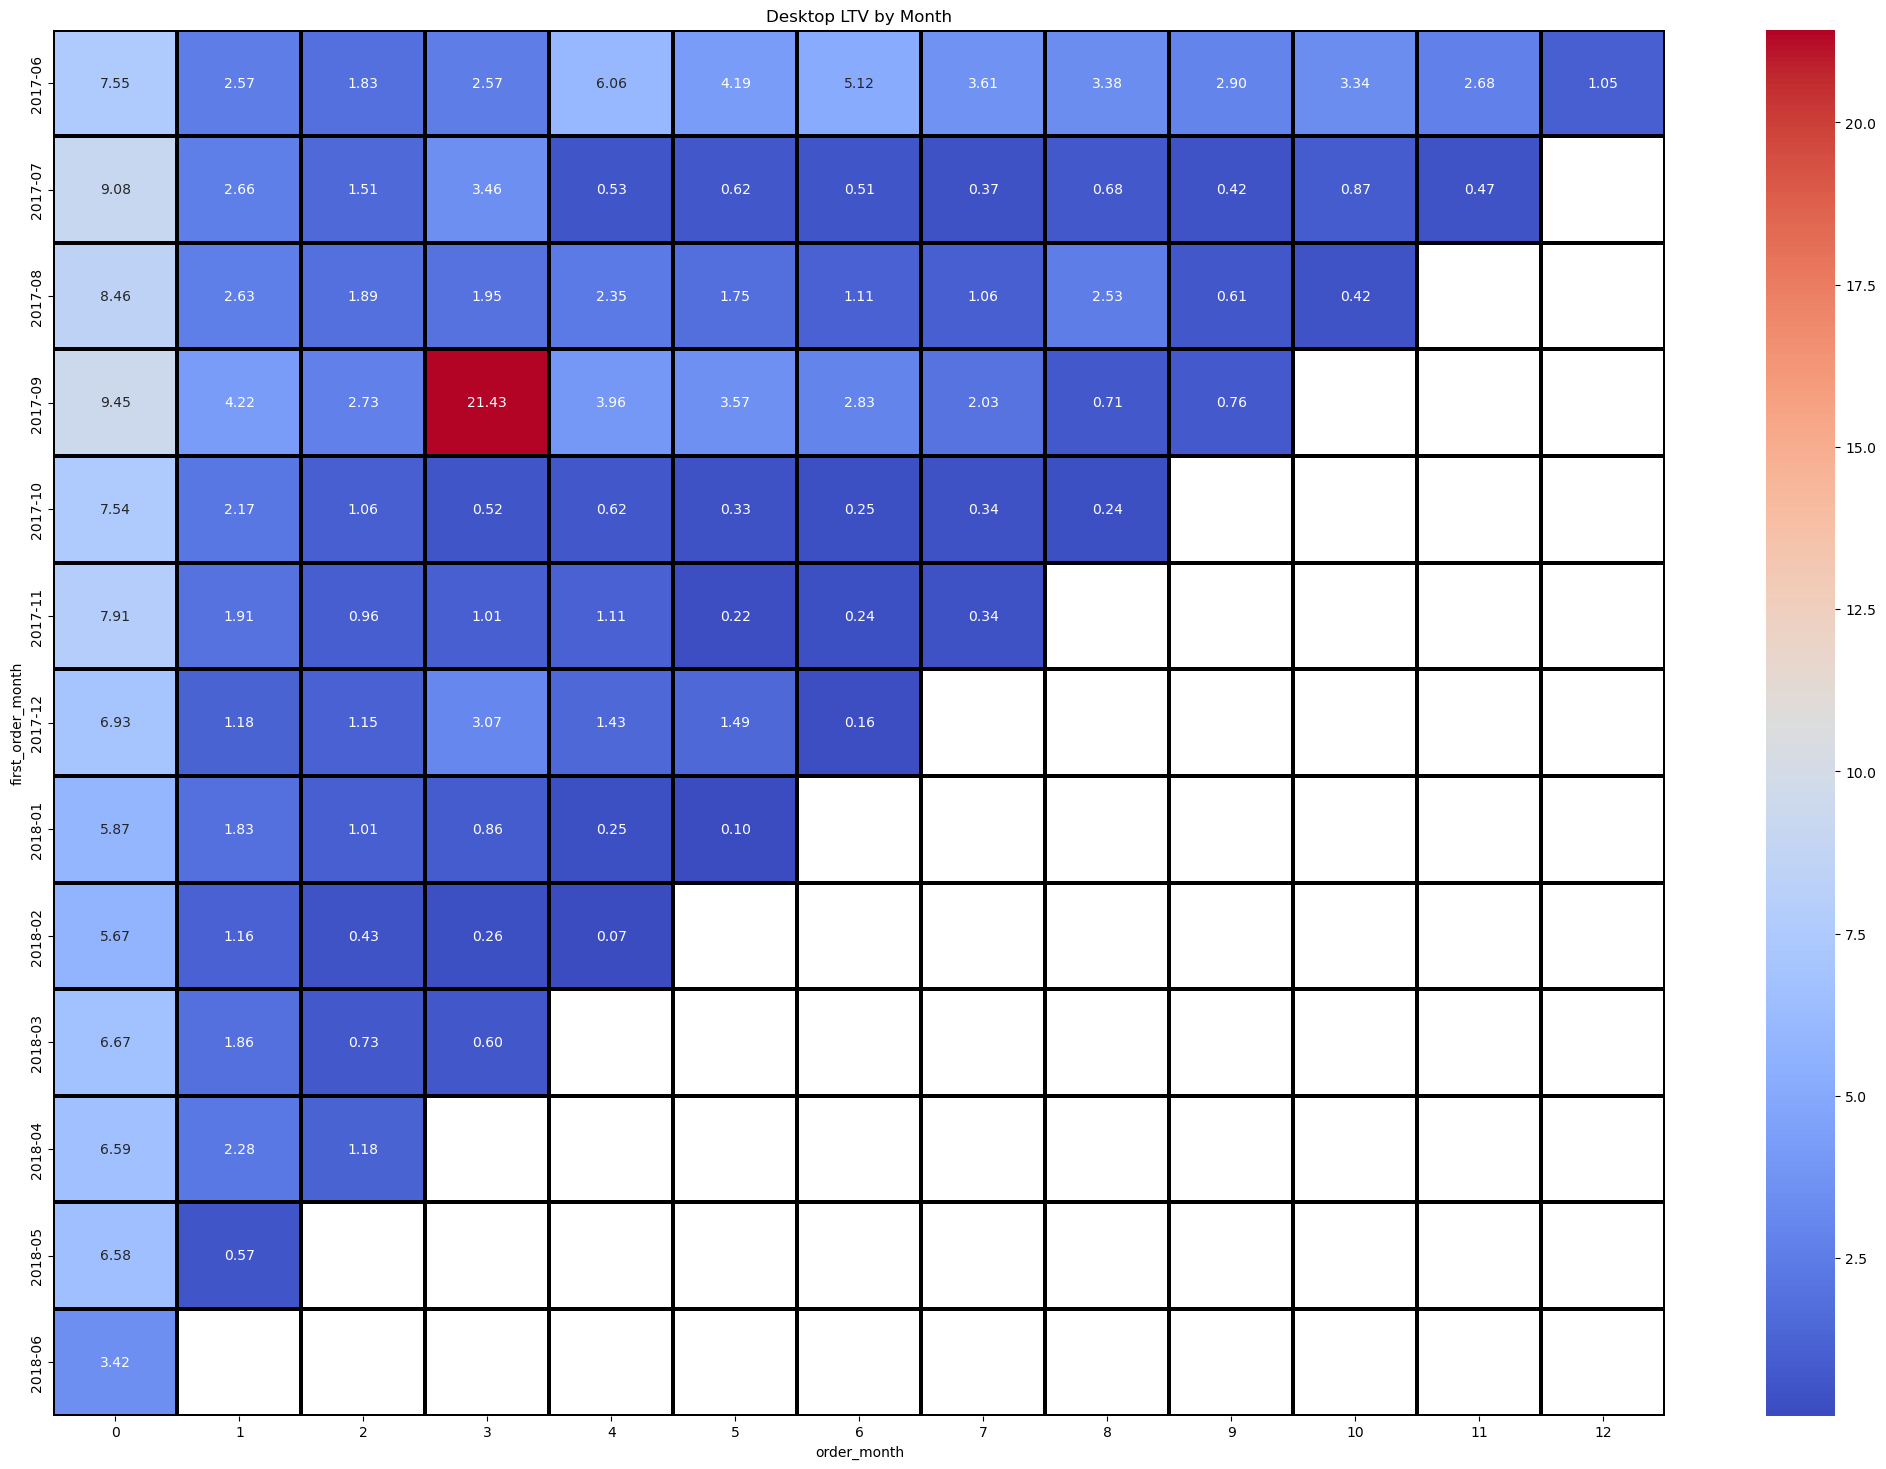

In [46]:
#Get LTV for Dekstop cohorts
report_desk['ltv'] = report_desk['revenue'] / report_desk['n_users']

#Do pivot table
report_desk_pivot = report_desk.pivot_table(
    index = 'first_order_month',
    columns = 'order_month',
    values = 'ltv',
)

#Plot HeatMap
plt.figure(figsize = (26, 18))
plt.title('Desktop LTV by Month')
sns.heatmap(report_desk_pivot,
            cmap = 'coolwarm',
           annot = True,
           fmt = '.2f',
           linewidths = 1.5,
           linecolor = 'black')

In [47]:
#Get cohort sizes for Touch users
cohort_sizes_touch = cohort_monthly_orders_touch.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_touch.columns = ['first_order_month', 'n_users']
print(cohort_sizes_touch.head(10))

  first_order_month  n_users
0           2017-06      454
1           2017-07      520
2           2017-08      325
3           2017-09      646
4           2017-10     1005
5           2017-11      981
6           2017-12     1099
7           2018-01      817
8           2018-02      974
9           2018-03      879


In [48]:
#Get total revenue by cohort
cohort_touch_revenue = cohort_monthly_orders_touch.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
print(cohort_touch_revenue.head(10))

  first_order_month  order_month  revenue
0           2017-06            0  2320.56
1           2017-06            1   972.57
2           2017-06            2   359.42
3           2017-06            3   198.64
4           2017-06            4  1271.18
5           2017-06            5  1013.22
6           2017-06            6   787.84
7           2017-06            7   543.41
8           2017-06            8   367.62
9           2017-06            9   428.15


In [49]:
#Merge cohort sizes and revenue
report_touch = pd.merge(cohort_sizes_touch, cohort_touch_revenue, on = 'first_order_month')
print(report_touch.head(10))

  first_order_month  n_users  order_month  revenue
0           2017-06      454            0  2320.56
1           2017-06      454            1   972.57
2           2017-06      454            2   359.42
3           2017-06      454            3   198.64
4           2017-06      454            4  1271.18
5           2017-06      454            5  1013.22
6           2017-06      454            6   787.84
7           2017-06      454            7   543.41
8           2017-06      454            8   367.62
9           2017-06      454            9   428.15


<Axes: title={'center': 'Touch LTV by Month'}, xlabel='order_month', ylabel='first_order_month'>

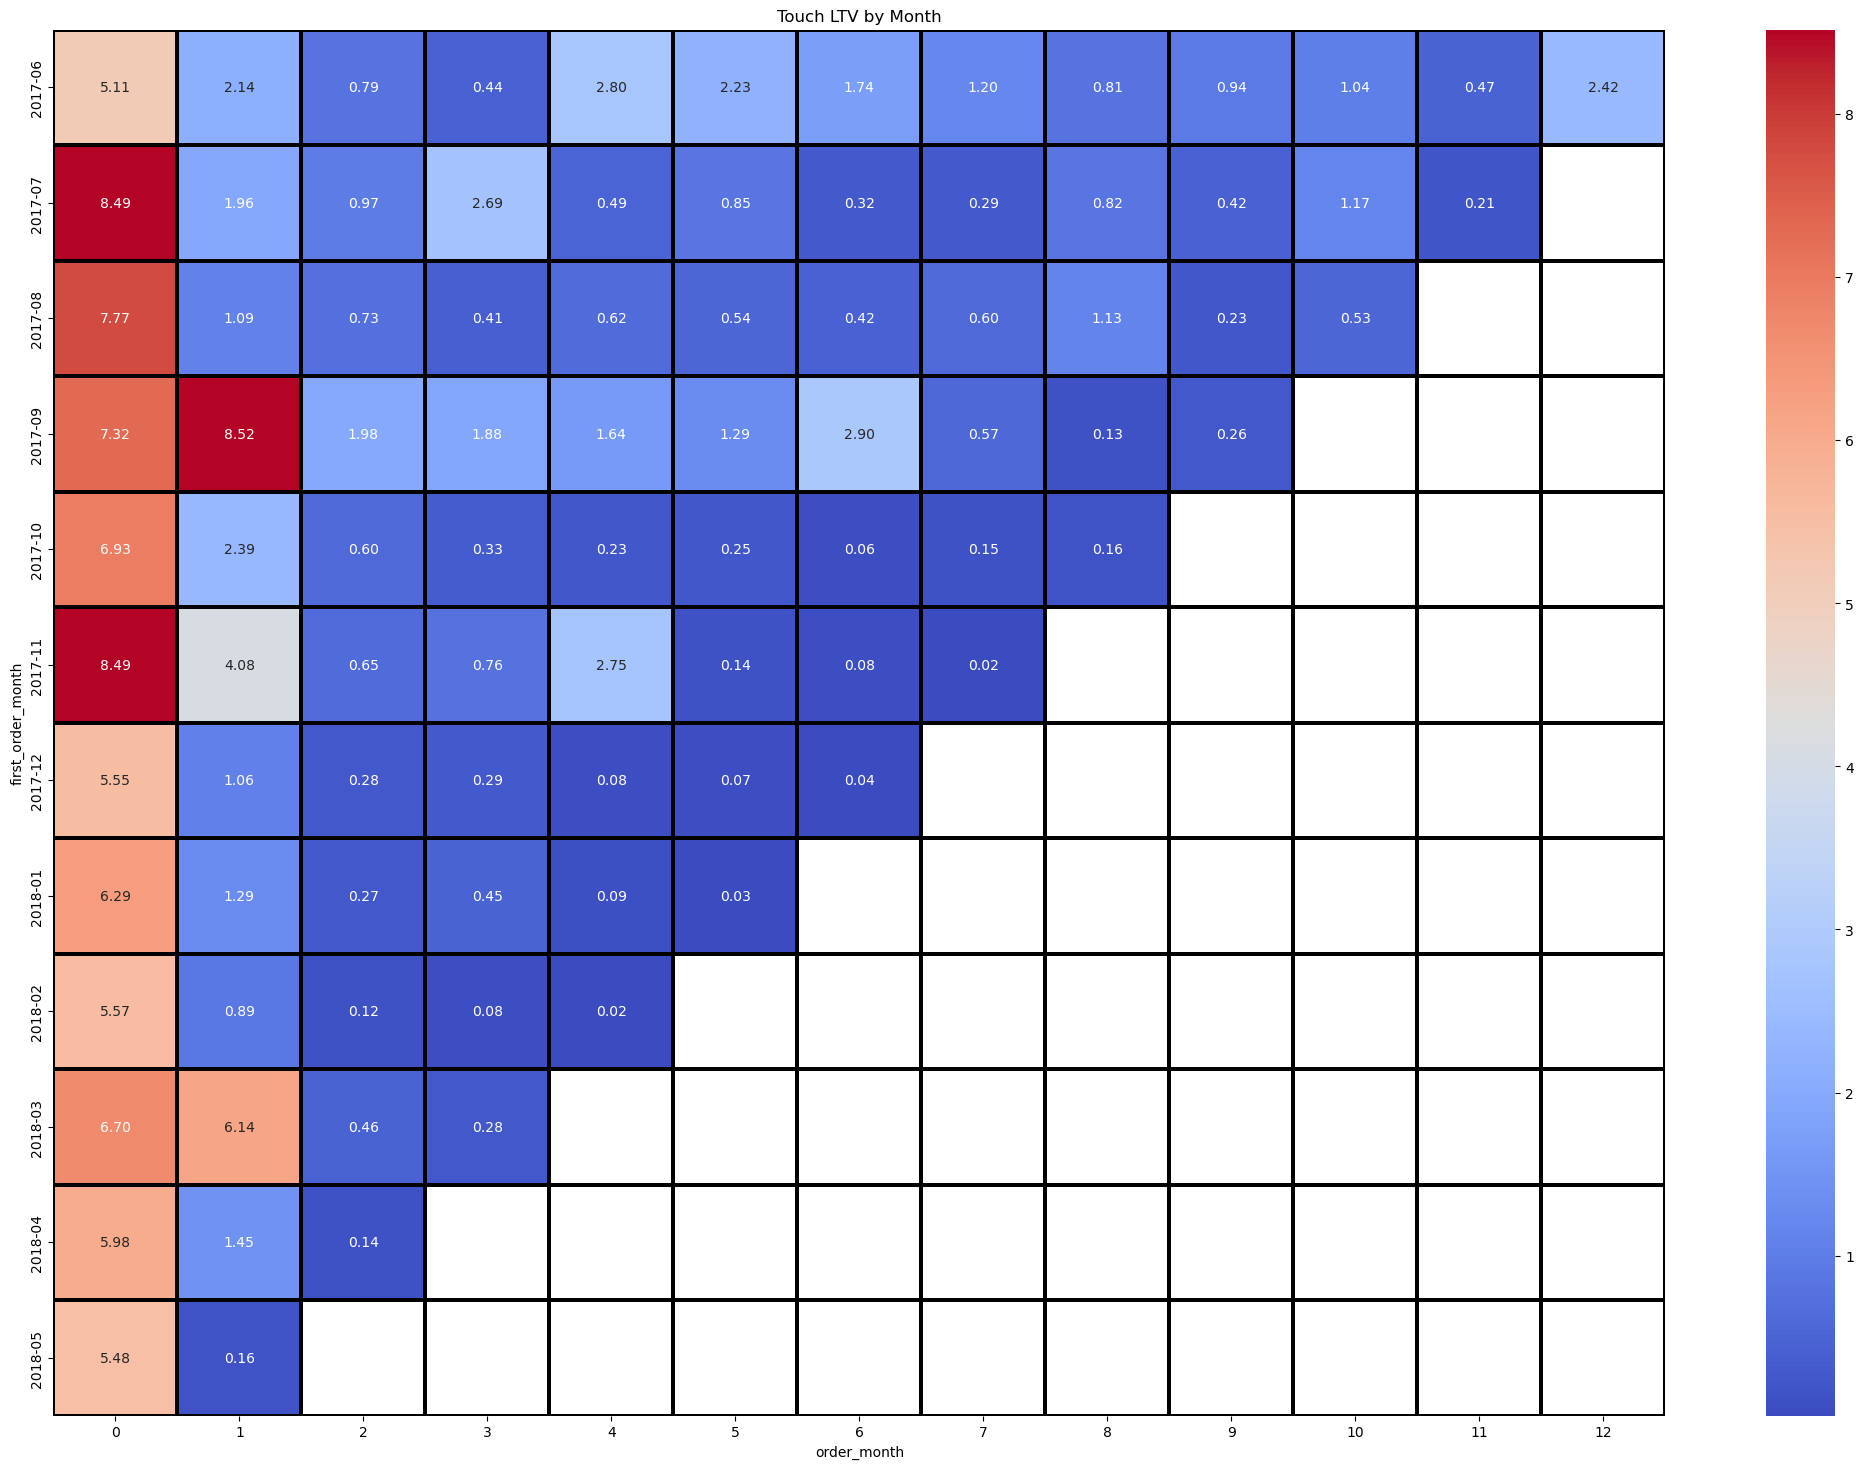

In [50]:
#Get LTV for Touch cohorts
report_touch['ltv'] = report_touch['revenue'] / report_touch['n_users']

#Do pivot table
report_touch_pivot = report_touch.pivot_table(
    index = 'first_order_month',
    columns = 'order_month',
    values = 'ltv',
)

#Plot HeatMap
plt.figure(figsize = (26, 18))
plt.title('Touch LTV by Month')
sns.heatmap(report_touch_pivot,
            cmap = 'coolwarm',
           annot = True,
           fmt = '.2f',
           linewidths = 1.5,
           linecolor = 'black')

Looking at both LTV heatmaps, it can be seen that users on both devices are similar, having an increase in the first 3 to 6 months, it could be the launches of events for the following year or at the end of the year, however, something unusual happens in the September 2017 cohort on both devices, there was an increase in the third month for Desktop and in the first month for Touch, it could be that there were marketing campaigns in September 2017 that attracted several customers, and also some other campaigns focused on different sources that specifically impacted this cohort.

In [51]:
#Create 'cost_month' convert it to month
costs['cost_month'] = costs['dt'].dt.to_period('M')
print(costs.head(10))

   source_id         dt  costs cost_month
0          1 2017-06-01  75.20    2017-06
1          1 2017-06-02  62.25    2017-06
2          1 2017-06-03  36.53    2017-06
3          1 2017-06-04  55.00    2017-06
4          1 2017-06-05  57.08    2017-06
5          1 2017-06-06  40.39    2017-06
6          1 2017-06-07  40.59    2017-06
7          1 2017-06-08  56.63    2017-06
8          1 2017-06-09  40.16    2017-06
9          1 2017-06-10  43.24    2017-06


In [52]:
#Create new df 'monthly_costs' grouped by month and source to find cohorts 
monthly_costs = costs.groupby(['cost_month', 'source_id'])['costs'].sum().reset_index()
print(monthly_costs.head(10))

  cost_month  source_id    costs
0    2017-06          1  1125.61
1    2017-06          2  2427.38
2    2017-06          3  7731.65
3    2017-06          4  3514.80
4    2017-06          5  2616.12
5    2017-06          9   285.22
6    2017-06         10   314.22
7    2017-07          1  1072.88
8    2017-07          2  2333.11
9    2017-07          3  7674.37


<Axes: title={'center': 'Monthly Costs by Source'}, xlabel='source_id', ylabel='cost_month'>

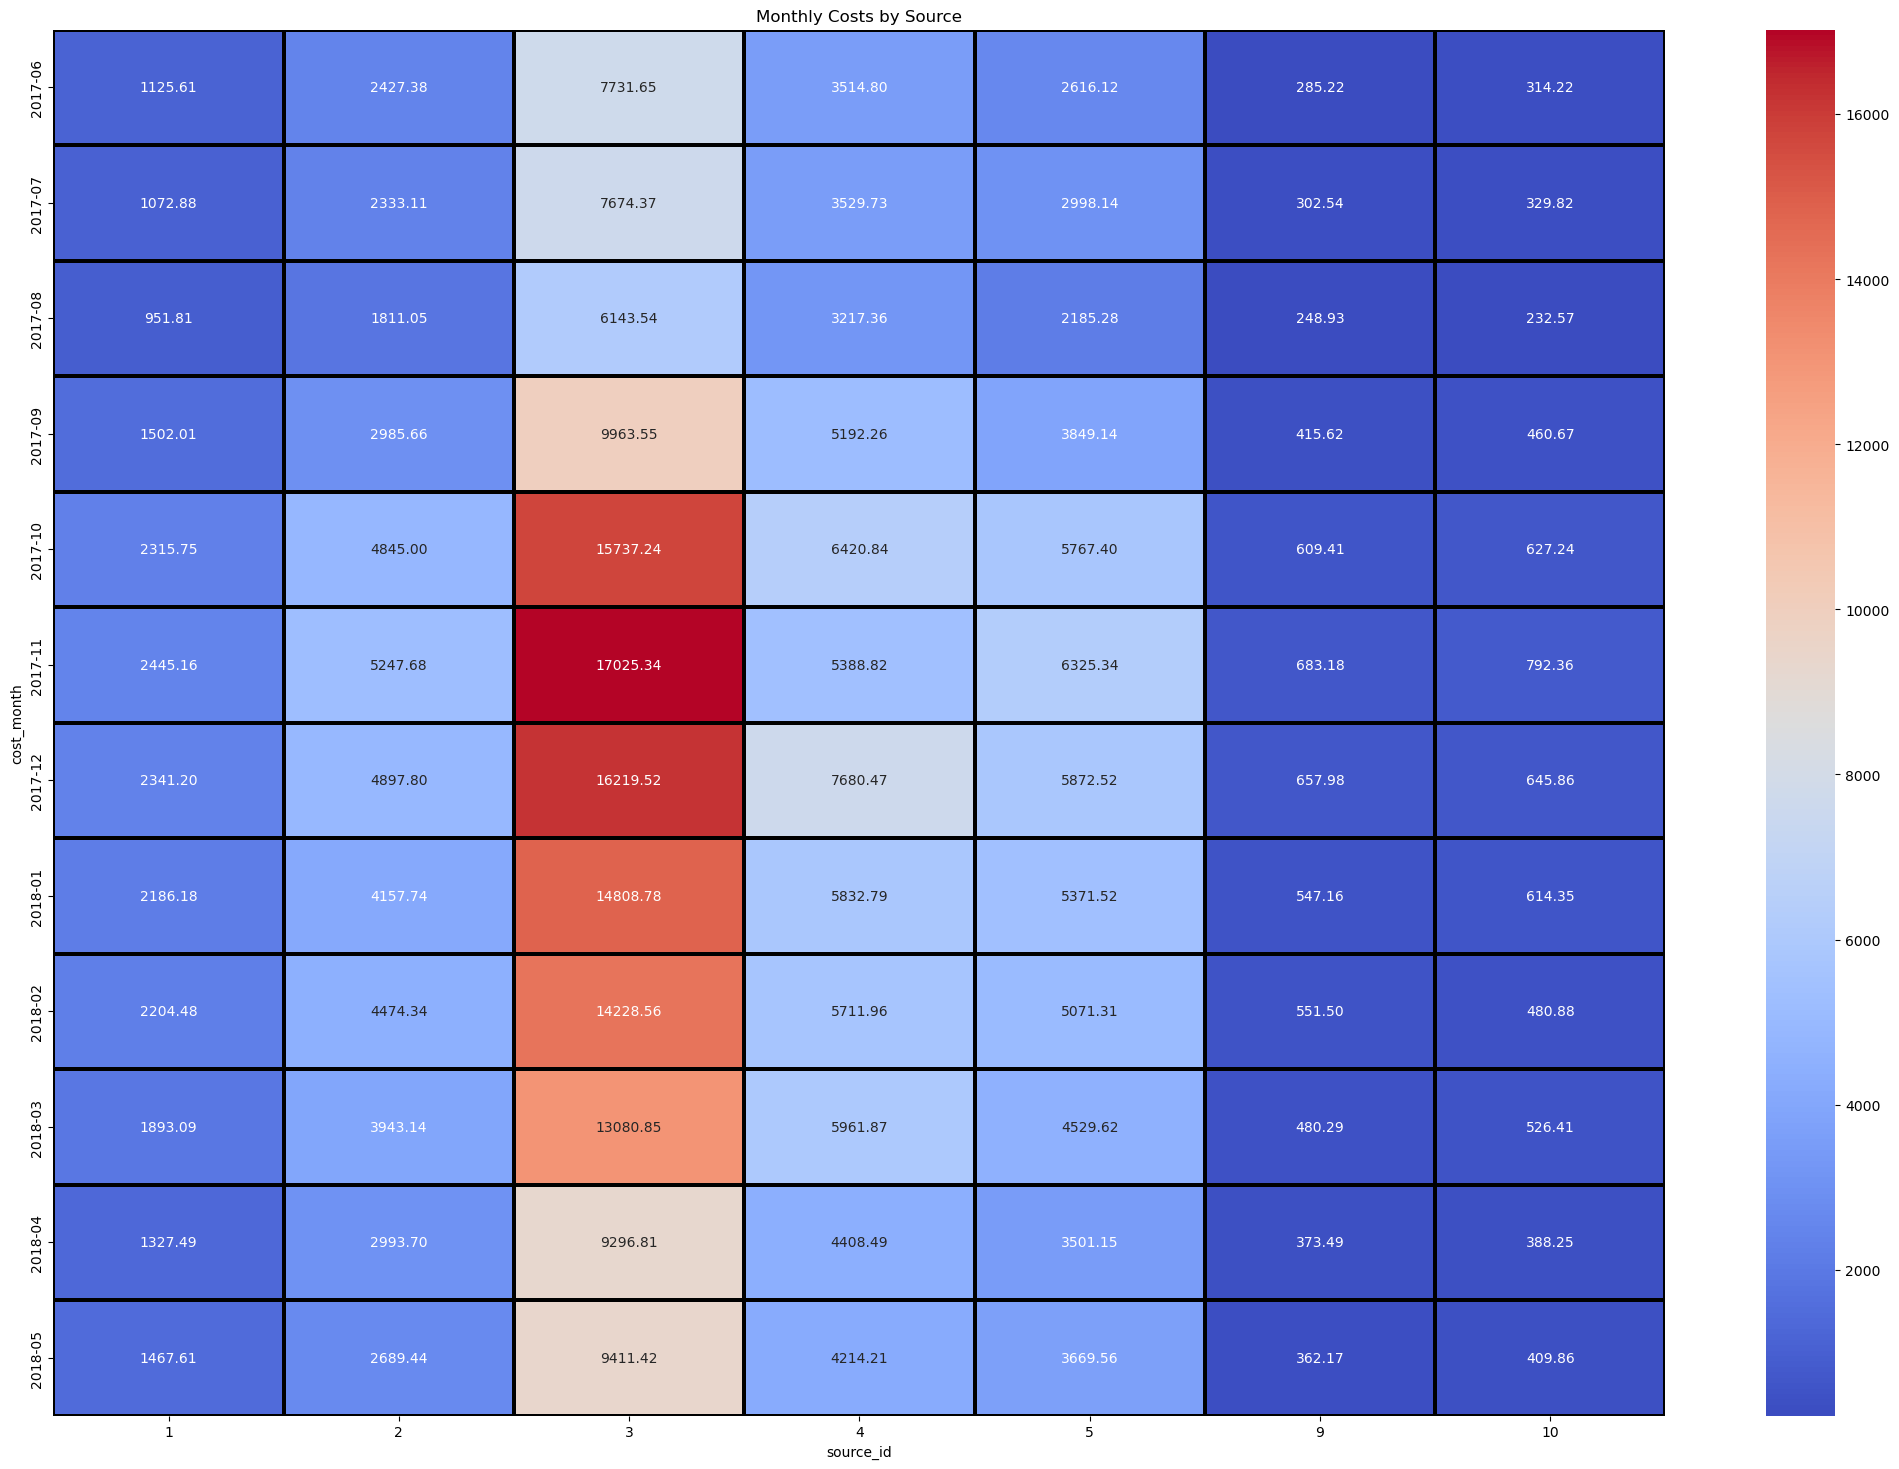

In [53]:
#Do pivot table
pivot_monthly_costs = monthly_costs.pivot_table(
    index = 'cost_month',
    columns = 'source_id',
    values = 'costs'
)

#Plot HeatMap
plt.figure(figsize = (26, 18))
plt.title('Monthly Costs by Source')
sns.heatmap(pivot_monthly_costs,
           cmap = 'coolwarm',
           annot = True,
           fmt = '.2f',
           linewidths = 1.5,
           linecolor = 'black')

<Axes: title={'center': 'Monthly CAC by Source'}, xlabel='source_id', ylabel='cost_month'>

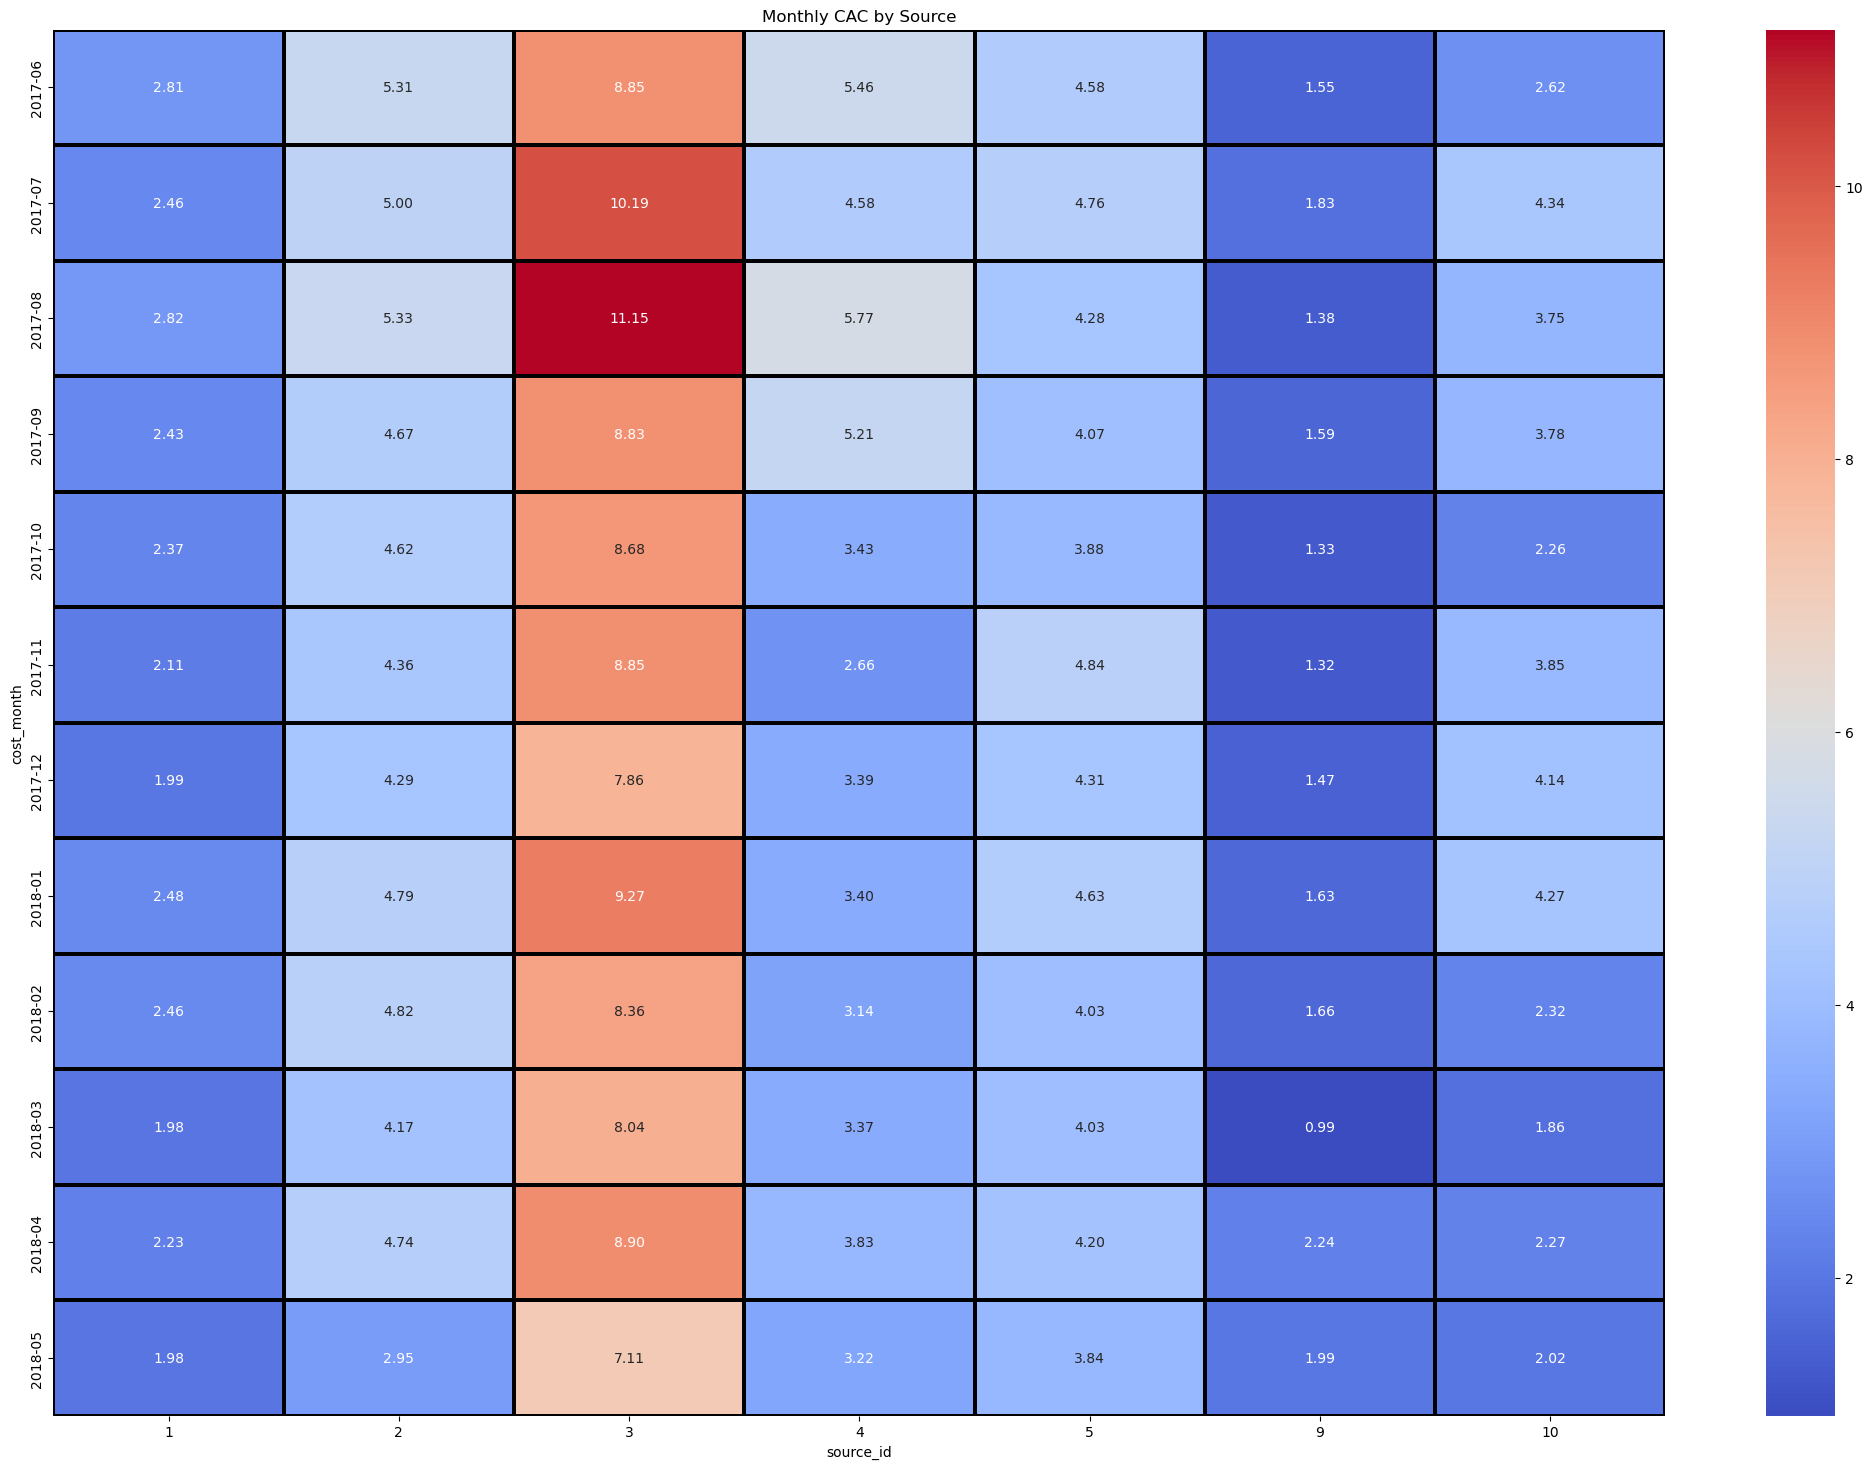

In [54]:
#Merge costs dfs de costos and order cohorts
total_data = pd.merge(monthly_costs, cohort_monthly_orders, left_on = ['cost_month', 'source_id'], right_on = ['buy_month', 'source_id'], how = 'outer')
#Create order cohorts
costs_cohort = total_data.groupby(['cost_month', 'source_id', 'costs']).agg({'uid': 'nunique', 'revenue': 'sum'}).reset_index()
#Get monthly CAC
costs_cohort['monthly_cac'] = costs_cohort['costs'] / costs_cohort['uid']

#Do pivot table
pivot_costs_cohort_cac = costs_cohort.pivot_table(
    index = 'cost_month',
    columns = 'source_id',
    values = 'monthly_cac'
)

#Plot HeatMap
plt.figure(figsize = (26, 18))
plt.title('Monthly CAC by Source')
sns.heatmap(pivot_costs_cohort_cac,
           cmap = 'coolwarm',
           annot = True,
           fmt = '.2f',
           linewidths = 1.5,
           linecolor = 'black')

In [55]:
#Get ROMI by cohort
costs_cohort['romi'] = ((costs_cohort['revenue'] - costs_cohort['costs']) / costs_cohort['costs']) * 100
print(costs_cohort.head(10))

  cost_month  source_id    costs  uid  revenue  monthly_cac        romi
0    2017-06          1  1125.61  401  2760.17     2.807007  145.215483
1    2017-06          2  2427.38  457  3492.17     5.311554   43.865814
2    2017-06          3  7731.65  874  4314.20     8.846281  -44.200785
3    2017-06          4  3514.80  644  4205.78     5.457764   19.659156
4    2017-06          5  2616.12  571  3333.91     4.581646   27.437197
5    2017-06          9   285.22  184   789.54     1.550109  176.817895
6    2017-06         10   314.22  120   536.93     2.618500   70.877092
7    2017-07          1  1072.88  437  4234.85     2.455103  294.717955
8    2017-07          2  2333.11  467  5079.66     4.995953  117.720553
9    2017-07          3  7674.37  753  5564.82    10.191726  -27.488250


<Axes: title={'center': 'Monthly ROMI by Source'}, xlabel='source_id', ylabel='cost_month'>

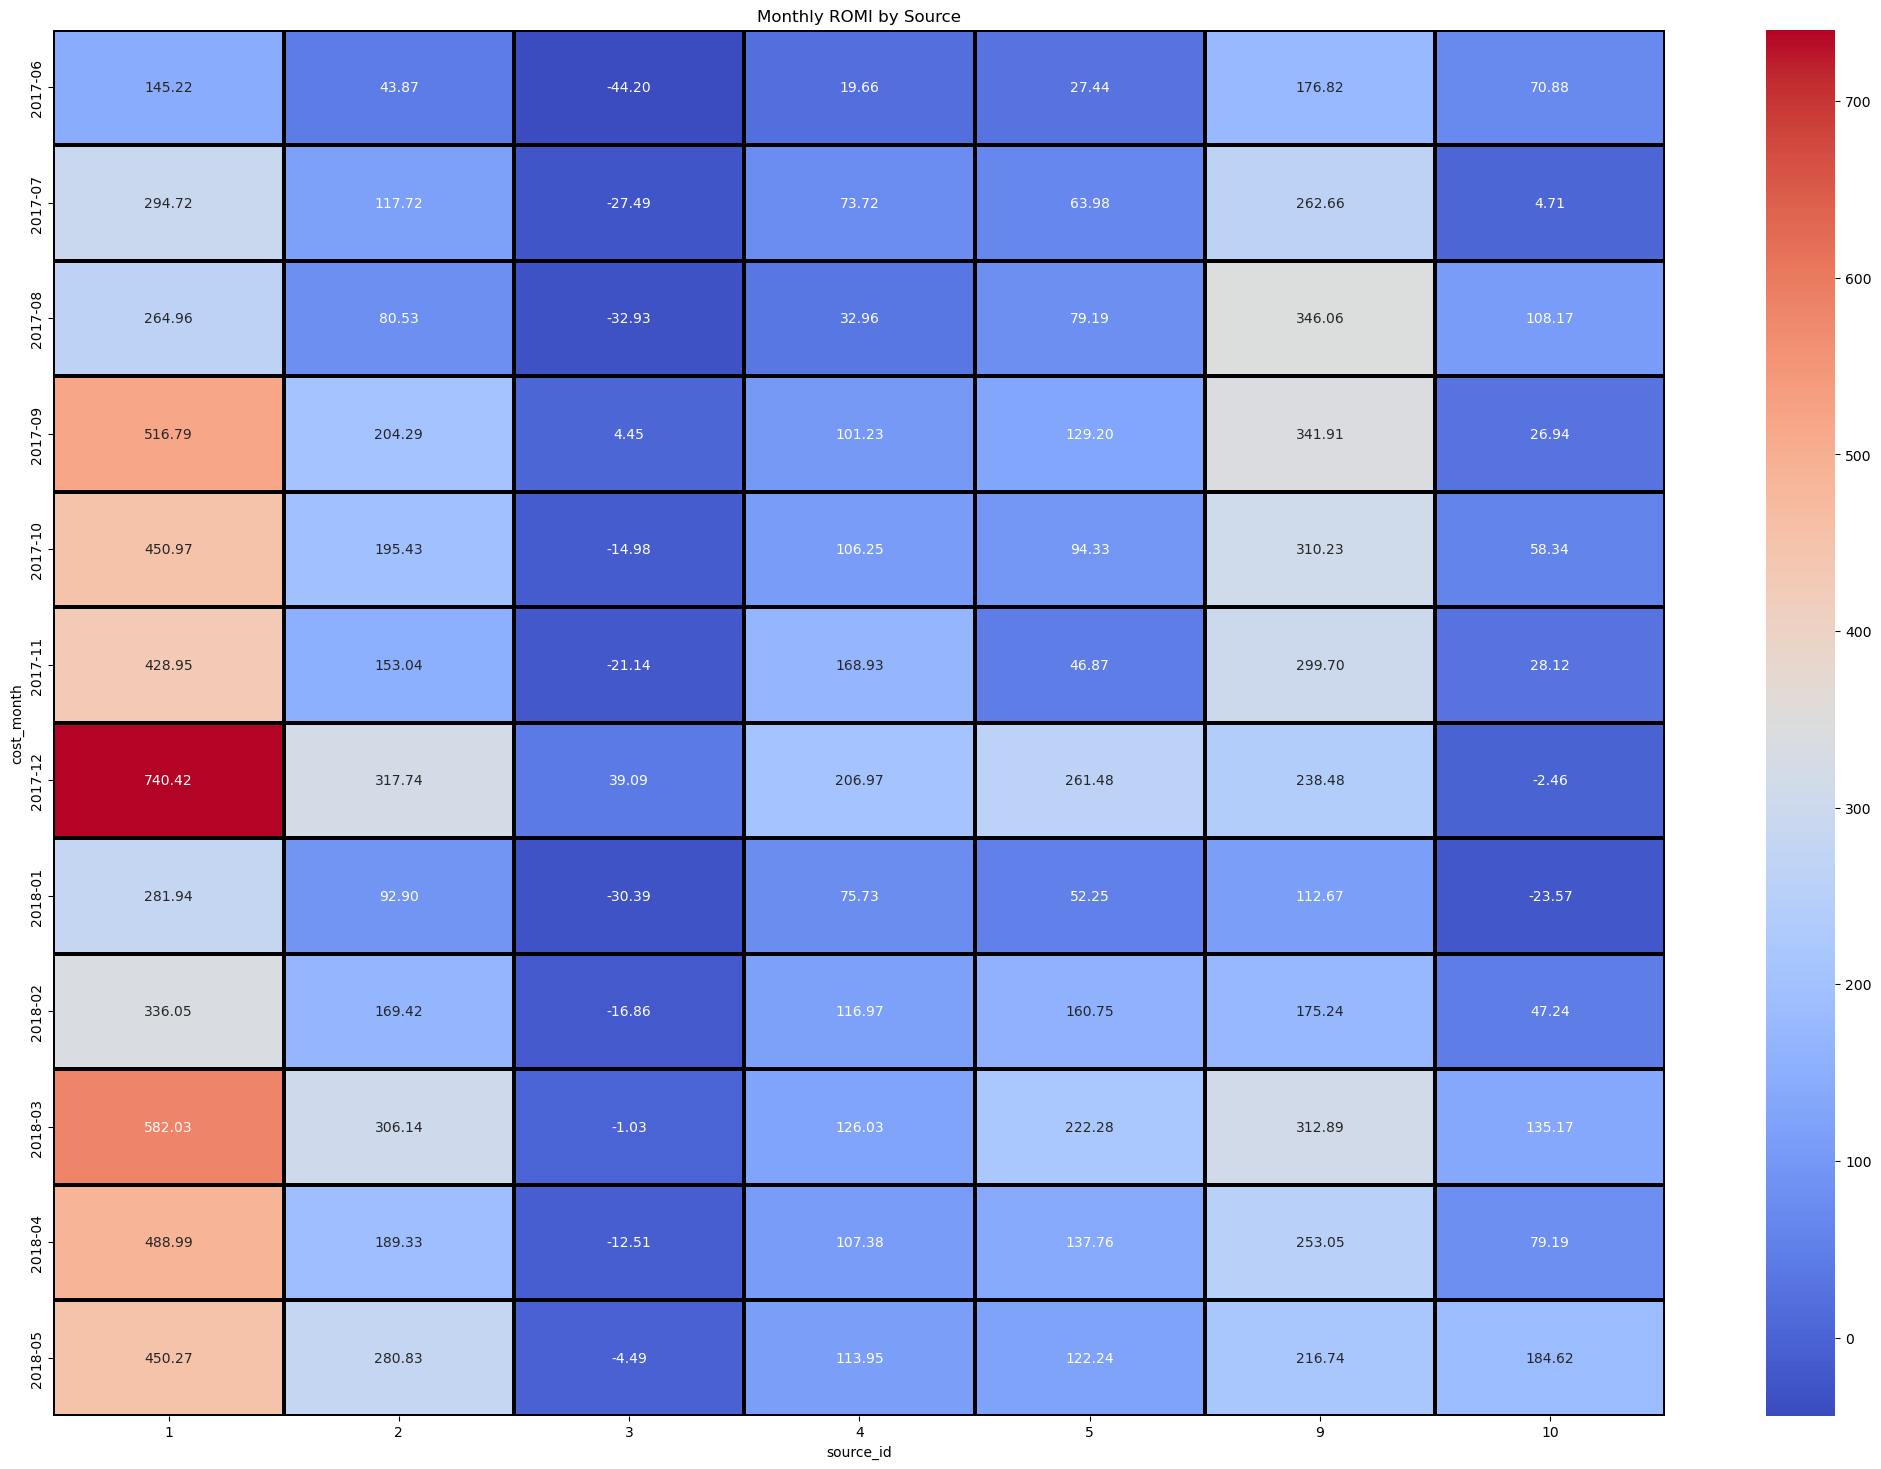

In [56]:
#Do pivot table
pivot_costs_cohort_romi = costs_cohort.pivot_table(
    index = 'cost_month',
    columns = 'source_id',
    values = 'romi'
)

#Plot pivot table
plt.figure(figsize = (26, 18))
plt.title('Monthly ROMI by Source')
sns.heatmap(pivot_costs_cohort_romi,
           cmap = 'coolwarm',
           annot = True,
           fmt = '.2f',
           linewidths = 1.5,
           linecolor = 'black')


Observando las tres cohortes de Costo Mensual, CAC y ROMI mensual por fuente, se puede concluir que la fuente con menores resultados fue la fuente 3, teniendo costos mensuales y CAC muy altos, y obteniendo ROMIs negativos, por lo que, no creo que se deba de seguir invirtiendo en esa fuente de atracción de clientes. Por otro lado, la fuente 1 fue la de mejores resultados, teniendo costos mensuales y CAC bajos en comparación a la fuente 3, y obteniendo los ROMIs más altos, llegando hasta un retorno del 740.42% en diciembre de 2017. Por su parte, las demás fuentes tienen muy buenos resultados de ROMI y costos y CAC bajos, por lo que pueden funcionar como fuentes complementarias.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Felix! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Carga y exploración inicial de datos bien ejecutada, asegurando una comprensión sólida de la estructura de los datos.<br>
• Conversión precisa de tipos de datos, especialmente en columnas de tiempo, lo cual es crucial para análisis temporales.<br>
• Verificación y manejo efectivo de duplicados en múltiples dataframes, asegurando la integridad de los datos.<br>
• Creación de nuevas columnas para análisis temporal, lo que te permite realizar un análisis más granular.<br>
• Cálculo detallado de la duración de las visitas, proporcionando una visión clara del comportamiento del usuario.<br>
• Implementación efectiva de análisis de cohortes, permitiendo un seguimiento detallado del comportamiento del usuario a lo largo del tiempo.<br>
• Uso adecuado de visualizaciones, como mapas de calor, para identificar patrones en los datos.<br>
• Cálculo preciso del LTV y CAC, fundamentales para el análisis financiero.<br>
• Gestión adecuada de valores nulos, asegurando que los cálculos sean precisos.<br>
• Integración de múltiples fuentes de datos de manera coherente, lo cual es crucial para un análisis integral.<br>
¡Felicidades!
</div>
